In [1]:
#from obspy import read
from obspy import read_inventory, UTCDateTime, read #importar librerias para el desarrollo del codigo
from math import log10 
import pandas as pd
from obspy import read_events
#from obspy import _read_gse1
#from obspy import _read_gse2

In [2]:
t1 = read('20201101000000.gse' , format='GSE2')
print(t1)


/Users/sandrarosero/anaconda3/lib/python3.8/site-packages/obspy/io/gse2/libgse2.py:325: UserWarning: Checksum differs only in absolute value. If this file was written with ObsPy GSE2, this is due to a bug in the obspy.io.gse2.write routine (resolved with [3431]), and thus this message can be safely ignored.
  warnings.warn(msg, UserWarning)


252 Trace(s) in Stream:

PR.AGPR..HHZ | 2020-11-01T00:00:00.000000Z - 2020-11-01T00:09:59.990000Z | 100.0 Hz, 60000 samples
...
(250 other traces)
...
DR.SDD..BHE | 2020-11-01T00:00:00.150000Z - 2020-11-01T00:10:00.125000Z | 40.0 Hz, 24000 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]


In [3]:
i1=read_inventory('Package_1604642817611_0.xml')

In [4]:
datetime = UTCDateTime()                #Mándamos a traer a la función UTCDateTime() de Obspy, 
                                        #la cual convierte la fecha de "i1" al formato correcto para trabajar
    

#Utilizamos la función, get_response(), la cual recibe como argumento el canal con el que se va a trabajar 
#así como el formato de fecha adecuado para su uso (https://docs.obspy.org/packages/autogen/obspy.core.inventory.inventory.Inventory.get_response.html)
#Lo que nos devuelve esta función es la "respuesta" que tiene este canal para dicho evento
#En esta respuesta tenemos diferentes aspectos, como la velocidad de metros por segundo a cuentas 
resp = i1.get_response("PR.PRSN.00.HH1", datetime)
print(datetime)
print(resp)

2021-03-25T11:49:45.301443Z
Channel Response
	From M/S (Velocity in meters per second) to COUNTS ()
	Overall Sensitivity: 4.81e+08 defined at 1.000 Hz
	5 stages:
		Stage 1: PolesZerosResponseStage from M/S to V, gain: 1202.5
		Stage 2: CoefficientsTypeResponseStage from V to COUNTS, gain: 400000
		Stage 3: FIRResponseStage from COUNTS to COUNTS, gain: 1
		Stage 4: FIRResponseStage from COUNTS to COUNTS, gain: 1
		Stage 5: FIRResponseStage from COUNTS to COUNTS, gain: 1


In [5]:
paz_wa   = {'sensitivity': 2800, 'zeros': [0j], 'poles': [-6.2832 - 4.7124j, -6.2832 + 4.7124j], 'gain': 1,}
paz_wa

{'sensitivity': 2800,
 'zeros': [0j],
 'poles': [(-6.2832-4.7124j), (-6.2832+4.7124j)],
 'gain': 1}

In [6]:
paz_inst = {'sensitivity': resp.instrument_sensitivity.value, 'zeros': resp.get_paz().zeros, 'poles': resp.get_paz().poles, 'gain' : resp.get_paz().normalization_factor}
paz_inst

{'sensitivity': 481000000.0,
 'zeros': [0j, 0j, (-31.63+0j), (-160+0j), (-350+0j), (-3177+0j)],
 'poles': [(-0.036614+0.037059j),
  (-0.036614-0.037059j),
  (-32.55+0j),
  (-142+0j),
  (-364+404j),
  (-364-404j),
  (-1260+0j),
  (-4900+5200j),
  (-4900-5200j),
  (-7100+1700j),
  (-7100-1700j)],
 'gain': 8.31871e+17}

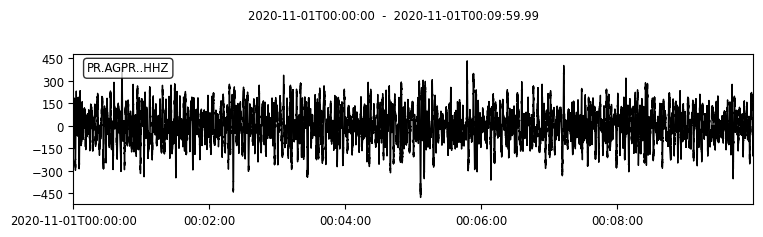

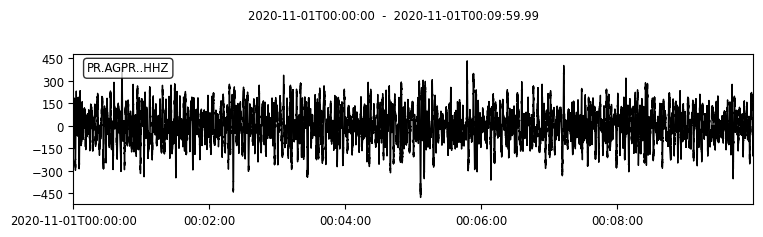

In [7]:
t1[0].plot()

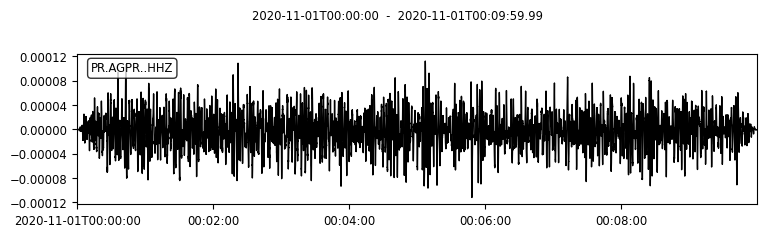

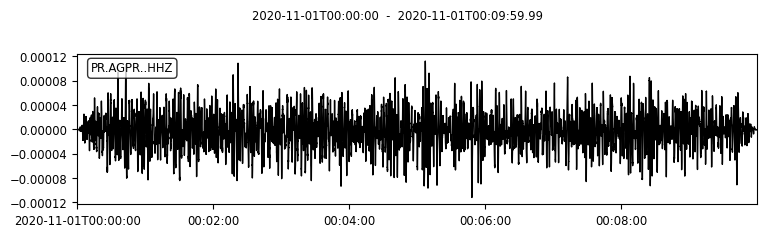

In [8]:
t1[0].detrend()
t1[0].simulate(paz_remove=paz_inst, paz_simulate=paz_wa)
t1[0].plot()

In [9]:
ampl = t1[0].max()
ampl

0.00034020936912157956

In [10]:
a = 0.018
b = 2.17

epi_dist = 35.50 / 1000 #que pasa con la profundidad? 

ml = log10(ampl * 1000) + a * epi_dist + b
ml

1.702385269599224